# Auswertung der Zahlen ohne Grafik
Mal schauen wo es am meisten Firmen gibt - und ob der Vergleichswert auch was bringt.

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import os
import re
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"

In [2]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/Kanton_ganz_mit_Vergleichswert")

In [3]:
df_sauber

,Unnamed: 0,Unnamed: 0.1,Adresse,Firmen,Seite_y,Telbuch,Seite_x,STRNAME,GDENAME,GKODE,GKODN,Vergleich
0,0,0,"Zugerstrasse 74, Baar",164,frontpage2_976.htm,12,telfront10000.htm,Zugerstrasse,Baar,2681933.977,1226416.568,13.666667
1,1,1,"Mühlegasse 18, Baar",92,frontpage30_262.htm,57,telfront10001.htm,Mühlegasse,Baar,2682425.299,1228159.836,1.614035
2,2,2,"Blegistrasse 11b, Baar",88,frontpage2_936.htm,13,telfront10002.htm,Blegistrasse,Baar,2685739.840,1230044.629,6.769231
3,3,3,"Sihlbruggstrasse 105, Baar",80,frontpage2_530.htm,39,telfront10003.htm,Sihlbruggstrasse,Baar,2684903.579,1229684.742,2.051282
4,4,4,"Ruessenstrasse 12, Baar",75,frontpage2_963.htm,16,telfront10004.htm,Ruessenstrasse,Baar,2685107.750,1229580.996,4.687500
...,...,...,...,...,...,...,...,...,...,...,...,...
6975,4684,4685,"Chamerstrasse 51.z, Zug",0,frontpage1032.htm,1,telfront995.htm,Chamerstrasse,Zug,2680782.000,1225353.000,0.000000
6976,4685,4686,"Chamerstrasse 52, Zug",11,frontpage1033.htm,5,telfront996.htm,Chamerstrasse,Zug,2680846.193,1225345.734,2.200000
6977,4686,4687,"Chamerstrasse 53, Zug",0,frontpage1034.htm,1,telfront997.htm,Chamerstrasse,Zug,2680773.323,1225372.849,0.000000
6978,4687,4688,"Chamerstrasse 54, Zug",3,frontpage1035.htm,4,telfront998.htm,Chamerstrasse,Zug,2680828.182,1225361.153,0.750000


In [4]:
dfhr=df_sauber[["Adresse", "Firmen", "Telbuch","Vergleich", "STRNAME", "GDENAME"]]
dfhr.dtypes

Adresse       object
Firmen         int64
Telbuch        int64
Vergleich    float64
STRNAME       object
GDENAME       object
dtype: object

In [5]:
dfhr["STR_GMD"]=dfhr["STRNAME"]+", "+ dfhr["GDENAME"]

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
dfhr

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
0,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
1,"Mühlegasse 18, Baar",92,57,1.614035,Mühlegasse,Baar,"Mühlegasse, Baar"
2,"Blegistrasse 11b, Baar",88,13,6.769231,Blegistrasse,Baar,"Blegistrasse, Baar"
3,"Sihlbruggstrasse 105, Baar",80,39,2.051282,Sihlbruggstrasse,Baar,"Sihlbruggstrasse, Baar"
4,"Ruessenstrasse 12, Baar",75,16,4.687500,Ruessenstrasse,Baar,"Ruessenstrasse, Baar"
...,...,...,...,...,...,...,...
6975,"Chamerstrasse 51.z, Zug",0,1,0.000000,Chamerstrasse,Zug,"Chamerstrasse, Zug"
6976,"Chamerstrasse 52, Zug",11,5,2.200000,Chamerstrasse,Zug,"Chamerstrasse, Zug"
6977,"Chamerstrasse 53, Zug",0,1,0.000000,Chamerstrasse,Zug,"Chamerstrasse, Zug"
6978,"Chamerstrasse 54, Zug",3,4,0.750000,Chamerstrasse,Zug,"Chamerstrasse, Zug"


Ich entscheide mich, Adressen mit weniger als 10 Firmen nicht zu berücksichtigen. 

# Hitparade 
- wo sind die meisten Firmen
- wo sind die Adressen mit mehr als 20 Firmen und einem grösseren Vergleichswert als 5
- wie sieht es aus wenn ich an den Auswahlkriterien rumschraube?


In [7]:
# Hier die Absolute Anzahl Firmen pro Ort
dfhr.sort_values("Firmen", ascending=False).head(50)


,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
6501,"Bahnhofstrasse 21, Zug",328,32,10.250000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6456,"Baarerstrasse 75, Zug",277,36,7.694444,Baarerstrasse,Zug,"Baarerstrasse, Zug"
6931,"Chamerstrasse 172, Zug",220,27,8.148148,Chamerstrasse,Zug,"Chamerstrasse, Zug"
2406,"Dammstrasse 19, Zug",219,45,4.866667,Dammstrasse,Zug,"Dammstrasse, Zug"
387,"Neuhofstrasse 5a, Baar",214,34,6.294118,Neuhofstrasse,Baar,"Neuhofstrasse, Baar"
3690,"Industriestrasse 47, Zug",197,33,5.969697,Industriestrasse,Zug,"Industriestrasse, Zug"
6488,"Bahnhofstrasse 10, Zug",193,35,5.514286,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
1798,"Lindenstrasse 16, Baar",183,19,9.631579,Lindenstrasse,Baar,"Lindenstrasse, Baar"
0,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
6396,"Baarerstrasse 137, Zug",161,28,5.750000,Baarerstrasse,Zug,"Baarerstrasse, Zug"


In [8]:
# So sieht die Hitparade des Vergleichswerts aus
dfhr.sort_values("Vergleich", ascending=False).head(50)

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
6114,"Baarerstrasse 11.2, Zug",152,1,152.000000,Baarerstrasse,Zug,"Baarerstrasse, Zug"
2408,"Dammstrasse 21, Zug",28,1,28.000000,Dammstrasse,Zug,"Dammstrasse, Zug"
209,"Gulmstrasse 35, Oberägeri",24,1,24.000000,Gulmstrasse,Oberägeri,"Gulmstrasse, Oberägeri"
5550,"Unter Altstadt 15, Zug",19,1,19.000000,Unter Altstadt,Zug,"Unter Altstadt, Zug"
2917,"Grafenauweg 10, Zug",99,6,16.500000,Grafenauweg,Zug,"Grafenauweg, Zug"
0,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
1923,"Sinserstrasse 65, Cham",59,5,11.800000,Sinserstrasse,Cham,"Sinserstrasse, Cham"
6496,"Bahnhofstrasse 17, Zug",23,2,11.500000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6500,"Bahnhofstrasse 20, Zug",148,13,11.384615,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
3008,"Guggitalring 12, Zug",11,1,11.000000,Guggitalring,Zug,"Guggitalring, Zug"


In [9]:
#Nun mal bei allen schauen, die mehr als 20 Firmen haben und einen kleineren Wert als 
dfhr[(dfhr["Firmen"]>20) & (dfhr["Vergleich"]>5)].sort_values("Vergleich", ascending=False).head(50)

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
6114,"Baarerstrasse 11.2, Zug",152,1,152.000000,Baarerstrasse,Zug,"Baarerstrasse, Zug"
2408,"Dammstrasse 21, Zug",28,1,28.000000,Dammstrasse,Zug,"Dammstrasse, Zug"
209,"Gulmstrasse 35, Oberägeri",24,1,24.000000,Gulmstrasse,Oberägeri,"Gulmstrasse, Oberägeri"
2917,"Grafenauweg 10, Zug",99,6,16.500000,Grafenauweg,Zug,"Grafenauweg, Zug"
0,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
1923,"Sinserstrasse 65, Cham",59,5,11.800000,Sinserstrasse,Cham,"Sinserstrasse, Cham"
6496,"Bahnhofstrasse 17, Zug",23,2,11.500000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6500,"Bahnhofstrasse 20, Zug",148,13,11.384615,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
2974,"Gubelstrasse 11, Zug",149,14,10.642857,Gubelstrasse,Zug,"Gubelstrasse, Zug"
1317,"Hinterbergstrasse 49, Steinhausen",53,5,10.600000,Hinterbergstrasse,Steinhausen,"Hinterbergstrasse, Steinhausen"


In [10]:
#Nicht sehr überraschend: die Baarerstrasse wird am meisten genannt - ist wohl auch eine der längsten Strassen
dfhr.groupby("STRNAME").count().sort_values("Firmen",ascending=False)

,Adresse,Firmen,Telbuch,Vergleich,GDENAME,STR_GMD
STRNAME,,,,,,
Artherstrasse,190,190,190,190,190,190
Chamerstrasse,182,182,182,182,182,182
Zugerstrasse,144,144,144,144,144,144
Baarerstrasse,118,118,118,118,118,118
Zugerbergstrasse,114,114,114,114,114,114
...,...,...,...,...,...,...
Fortunagässli,1,1,1,1,1,1
Seemattweg,1,1,1,1,1,1
Moos,1,1,1,1,1,1


In [11]:
#Wie schaffe ich es, die Anzahl Firmen pro Strasse rauszugrüblen
dfhr.groupby("STRNAME").size().sort_values(ascending=False)

STRNAME
Artherstrasse       190
Chamerstrasse       182
Zugerstrasse        144
Baarerstrasse       118
Zugerbergstrasse    114
                   ... 
Sennweid              1
Gewerbezone           1
Sihlmatt              1
Geissbüel             1
Grindelegg            1
Length: 663, dtype: int64

In [12]:
#Voila, hier ganz Klar: Die Baarerstrasse hat die meisten Firmen
dfhr.groupby("STRNAME").sum().sort_values("Firmen",ascending=False).head(20)

,Firmen,Telbuch,Vergleich
STRNAME,,,
Baarerstrasse,2993,1481,344.838505
Bahnhofstrasse,1416,605,112.853242
Chamerstrasse,1044,1234,135.165214
Zugerstrasse,854,656,191.592921
Bösch,837,328,80.804701
Industriestrasse,733,516,87.646767
Hinterbergstrasse,525,277,78.760469
Poststrasse,502,427,41.054010
Gubelstrasse,472,372,36.742560


### Vergleichswert/Firmen pro Strasse
- wie erwartet ist die Baarerstrasse auch beim Vergleichswert am klarsten oben.
- danach die Chamerstrasse
- auffällig: die Unter Altstadt ist ziemlich hoch oben.

In [13]:
#... und auch den höchsen Vergleichswert. 
dfhr.groupby("STRNAME").sum().sort_values("Vergleich",ascending=False).head(20)

,Firmen,Telbuch,Vergleich
STRNAME,,,
Baarerstrasse,2993,1481,344.838505
Zugerstrasse,854,656,191.592921
Chamerstrasse,1044,1234,135.165214
Bahnhofstrasse,1416,605,112.853242
Industriestrasse,733,516,87.646767
Bösch,837,328,80.804701
Hinterbergstrasse,525,277,78.760469
Dorfstrasse,318,309,52.192237
Unter Altstadt,146,233,47.374417


In [14]:
# bei der Summe fällt auf
dfhr.groupby("STRNAME").sum().sort_values("Vergleich",ascending=False).head(40)

,Firmen,Telbuch,Vergleich
STRNAME,,,
Baarerstrasse,2993,1481,344.838505
Zugerstrasse,854,656,191.592921
Chamerstrasse,1044,1234,135.165214
Bahnhofstrasse,1416,605,112.853242
Industriestrasse,733,516,87.646767
Bösch,837,328,80.804701
Hinterbergstrasse,525,277,78.760469
Dorfstrasse,318,309,52.192237
Unter Altstadt,146,233,47.374417


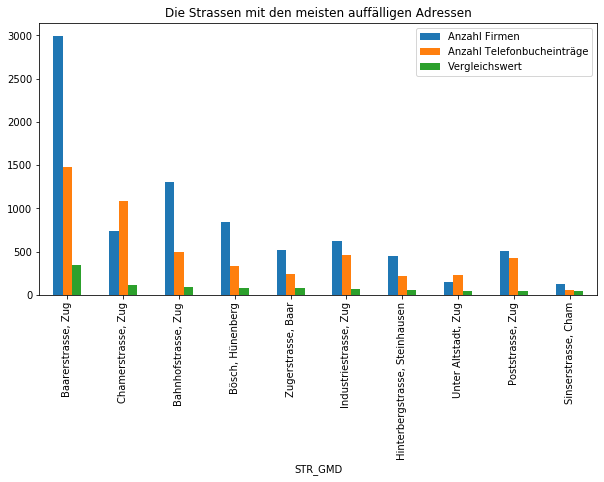

In [19]:
# bei der Summe fällt auf
ax = dfhr.groupby("STR_GMD").sum().sort_values("Vergleich",ascending=False).head(10).plot(kind="bar",figsize=(10,5), title="Die Strassen mit den meisten auffälligen Adressen")
# Erstaundlich: obwohl die Chamerstrasse über das ganze mehr Telefonbucheinträge hat als Firmen, 
#hat sie die zweihöchste Summe beim Vergleichswert.
ax.legend(["Anzahl Firmen", "Anzahl Telefonbucheinträge", "Vergleichswert"]) # Hier ändere ich die Legende

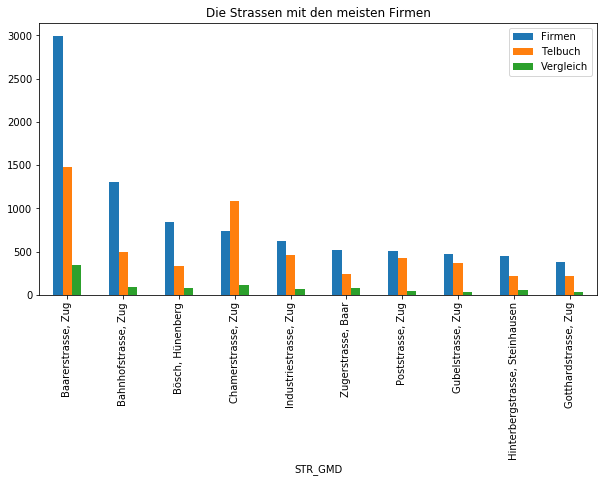

In [16]:
# bei der Summe fällt auf
dfhr.groupby("STR_GMD").sum().sort_values("Firmen",ascending=False).head(10).plot(kind="bar",figsize=(10,5), title="Die Strassen mit den meisten Firmen")

In [17]:
dfhr["STRNAME"].value_counts() 
# Die Baarerstrasse liegt deutlich hinter der Chamer und Artherstrasse wenn es um die Anzahl Adressen geht.
# Trotzdem ist sie top bezüglich Anzahl Adresse

Artherstrasse       190
Chamerstrasse       182
Zugerstrasse        144
Baarerstrasse       118
Zugerbergstrasse    114
                   ... 
Seemattweg            1
Winzwilen             1
Fröschenmatt          1
Kirchgasse            1
Acherweg              1
Name: STRNAME, Length: 663, dtype: int64